In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import re
%matplotlib inline

In [2]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

listings used to snap coordinates

In [4]:
train[train['listing_id'].isin([7094306, 6850662, 7198431, 7094306, 6972786, 6875908, 7135306, 7134644])]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
100346,1.0,1,e9f8fbe6cce51fe5e4418e1828bc6546,2016-04-15 02:52:24,"When you choose Infinity, you'll move into an ...",201 Commons Park,"[Fitness Center, Outdoor Pool, Residents Loung...",low,41.0412,6875908,-73.5400,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/6875908_34ef0687...,2195,201 Commons Park
22903,1.0,1,d09c78d9d6976885a66a470e1f42dd06,2016-06-10 02:47:43,"Beautiful, 1st floor 1 bed room apartment loca...",East 3rd Street,"[Elevator, Laundry in Building, Hardwood Floors]",medium,40.9067,7134644,-73.8147,456848d13f96dc522e5cf381095caeca,[],1350,590 East 3rd Street
26937,6.5,7,3be1175591e290053aa6997ac8f4e3bb,2016-06-22 03:15:54,This landmark English stone manor sits majesti...,206 Upper Mountain Avenu,"[Garage, Garden, Doorman]",low,40.8336,7198431,-74.2160,1d019cccf631394cd7f2aba471a54ca4,[https://photos.renthop.com/2/7198431_70d9d8ff...,14500,206 Upper Mountain Avenu
41067,1.0,0,78161d4bf7933c307f5a4ee7cabb95e9,2016-06-01 15:42:54,"The Harrison offers studios, 1 bedroom and two...",575 Easton Avenue,"[Balcony, Dishwasher, No Fee, Elevator, Fitnes...",medium,40.5065,7094306,-74.4708,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7094306_fe72e56d...,1310,575 Easton Avenue
48161,1.0,1,7a4079015508a8a94d2c87ffa2ebb146,2016-05-06 02:16:16,New Development. One bedroom apartment availab...,Brooklyn Ave,"[Elevator, Live-in superintendent, Dogs Allowe...",low,40.6592,6972786,-73.7001,22114d1931ab6a56676a692081b5d789,[https://photos.renthop.com/2/6972786_f72f5e9e...,1900,12 Brooklyn Ave
7086,1.0,2,cf19cf331c8dd2518eab5b88a7e5b2ca,2016-06-10 03:30:10,2 b/r with sliding glass doors off dining area...,Warburton\r,"[Dining Room, Terrace, Dishwasher, Hardwood Fl...",low,40.9894,7135306,-73.8832,db976724c28c1e157701fcf13d68823f,[https://photos.renthop.com/2/7135306_d524cb8b...,2400,384 Warburton\r
90453,1.0,0,bcff5fea2aa8b4bcc912e8ed3d25d6a4,2016-04-09 23:14:06,No fee! There's no need to look any further fo...,East 28th and Lexington Ave,"[Common Outdoor Space, Laundry In Unit, Cats A...",low,40.5813,6850662,-74.5343,aed64017aab5211439e8a6998f52f73b,[https://photos.renthop.com/2/6850662_5cf4238c...,3985,50 East 28th


In [3]:
cat_counts = pd.DataFrame({'name': ['manager_id', 'building_id', 'display_address', 'street_address']})
cat_counts['distinct'] = cat_counts['name'].apply(lambda name: len(set(list(train[name]) + list(test[name]))))
cat_counts

,name,distinct
0,manager_id,4399
1,building_id,11635
2,display_address,16068
3,street_address,25766


In [5]:
train['created'] = train['created'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
test['created'] = test['created'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [18]:
def bound(m, M):
    return lambda x: max(min(x, M), m)

for df in [train, test]:
    df['day_of_month'] = df['created'].apply(lambda x: x.day)
    df['month'] = df['created'].apply(lambda x: x.month)
    df['year'] = df['created'].apply(lambda x: x.year)
    df['day_of_week'] = df['created'].apply(lambda x: x.weekday())
    df['hour'] = df['created'].apply(lambda x: x.hour + (x.minute + x.second / 60.0) / 60.0)
    df['desc_len'] = df['description'].apply(lambda desc: len([x for x in re.split(r'\W+', desc) if len(x) > 0]))
    df['num_features'] = df['features'].apply(len)
    df['features_len'] = df['features'].apply(lambda feats: sum([len([x for x in re.split(r'\W+', feat) if len(x) > 0]) for feat in feats]))
    df['num_photos'] = df['photos'].apply(len)
    df['longitude'] = df['longitude'].apply(bound(-74.3434, -73.62))
    df['latitude'] = df['latitude'].apply(bound(40.4317, 41.0721))
    df['log_price'] = np.log(df['price'] + 1)

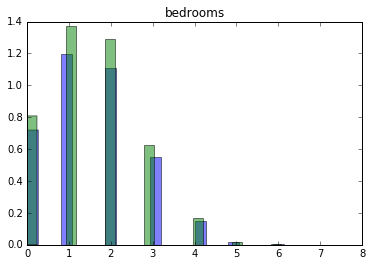

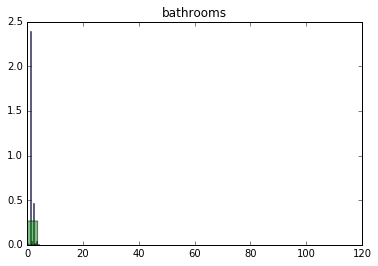

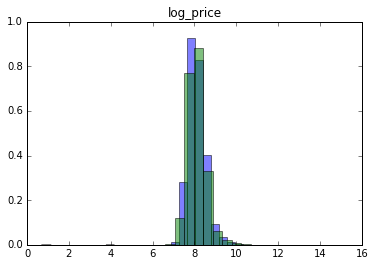

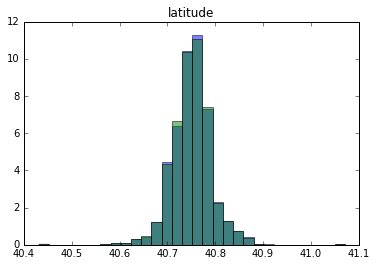

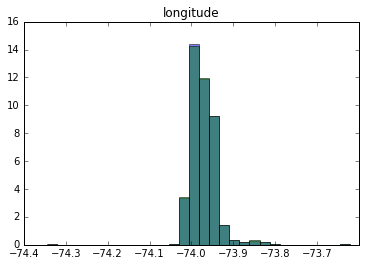

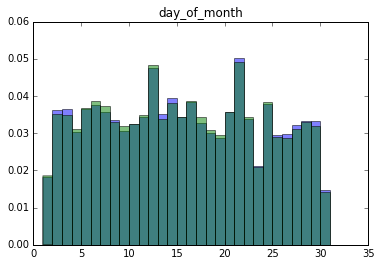

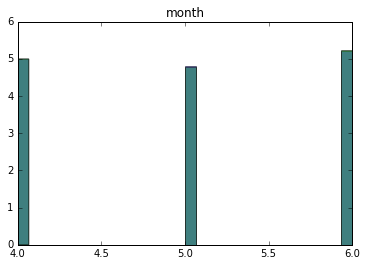

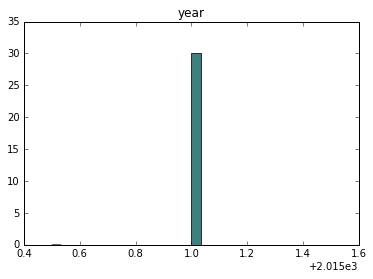

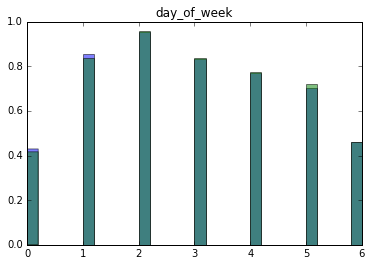

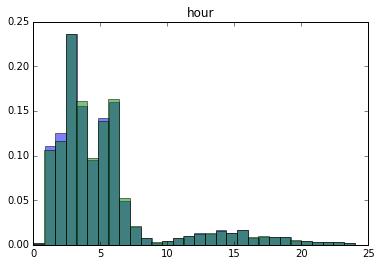

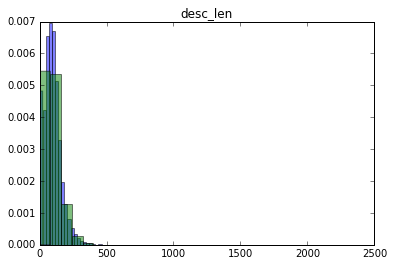

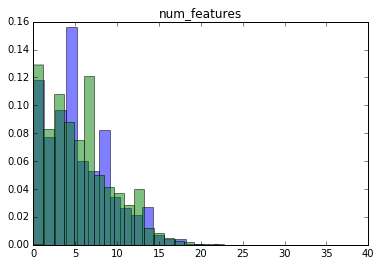

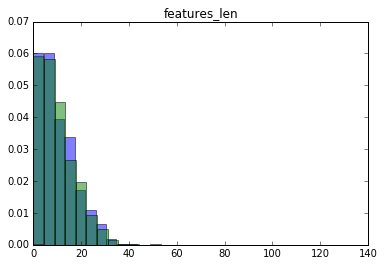

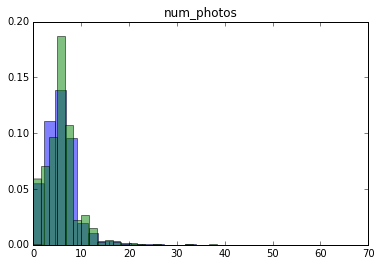

In [20]:
columns = ['bedrooms', 'bathrooms', 'log_price', 'latitude', 'longitude', 'day_of_month', 'month', 'year', 'day_of_week',
          'hour', 'desc_len', 'num_features', 'features_len', 'num_photos']
for col in columns:
    plt.figure()
    for df in [train, test]:
        plt.hist(df[col], alpha = 0.5, bins = 30, normed = True)
    plt.title(col)